# NUMERI PSEUDO RANDOMICI 

Scrivere un algoritmo per generare numeri pseudo casuali con distribuzione binomiale con b(2000,0.6)<br>
Verificare l'accordo con la distribuzione teorica di probabilità

In [40]:
#nel caso della binomiale noi abbiamo il coso successo-insuccesso dato dal fatto che un numero 
#finisce in un intervallo che va da 0 a 0.6 o che finisce nell'intervallo 0.6 a 1
#considero in questo caso successo il fatto di finire nel primo intervallo, e insuccesso il second
import numpy as np
from scipy.stats import probplot, binom
import matplotlib.pyplot as plt
N= 2000
p=0.6

print(f"Prob teorica :  [{p},{1-p}]")

array = np.zeros(2)
for i in range(N):
    x = np.random.rand()
    if(x > p):
        array[1] += 1
    else:
        array[0] += 1

print(f"Prob empirica :  {array/N}")

array_prob=[p,1-p]

Prob teorica :  [0.6,0.4]
Prob empirica :  [0.587 0.413]


<BarContainer object of 2 artists>

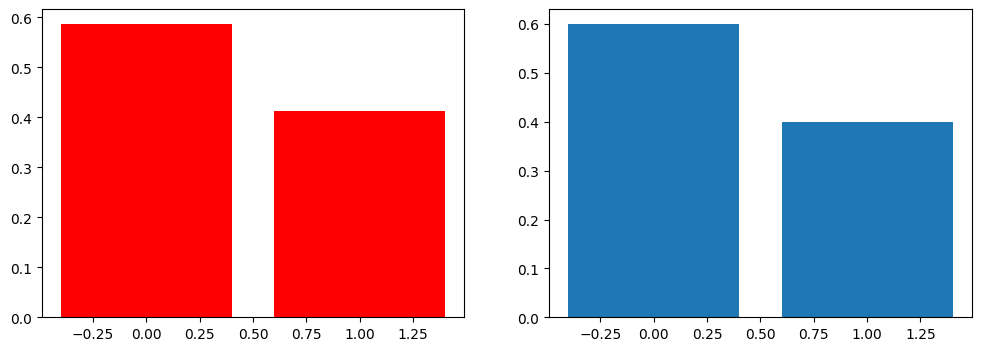

In [51]:
fig,ax = plt.subplots(1,2, figsize=(12,4))
ax[0].bar(np.arange(2),array/N,color='red') #distribuzione empirica
ax[1].bar(np.arange(2),array_prob) #distribuzione teorica

Scrivere un algoritmo per generare numeri pseudo casuali con distribuzione multinomiale con b(1/4, 1/2, 1/4)<br>
Verificare l'accordo con la distribuzione teorica di probabilità e disegnare l'istogramma

In [71]:
array_t = np.array([1/4, 1/2 , 1/4])
f_cum = np.cumsum(array_t)
N = 2000

v= np.zeros(3)
for i in range(2000):
    x= np.random.rand()
    for k in range(3):
        if(x < f_cum[k]):
            v[k]+=1
            break

print(f"Prob teorica :  {array_t}")
print(f"Prob empirica :  {v/N}")

Prob teorica :  [0.25 0.5  0.25]
Prob empirica :  [0.246 0.5   0.254]


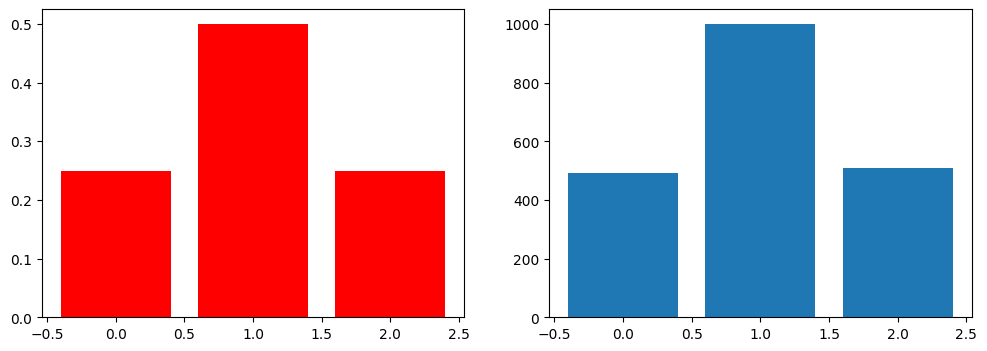

In [78]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].bar(np.arange(3), array_t,color='red')  #distribuzione teorica
ax[1].bar(np.arange(3), v) #distribuzione empirica
plt.show()

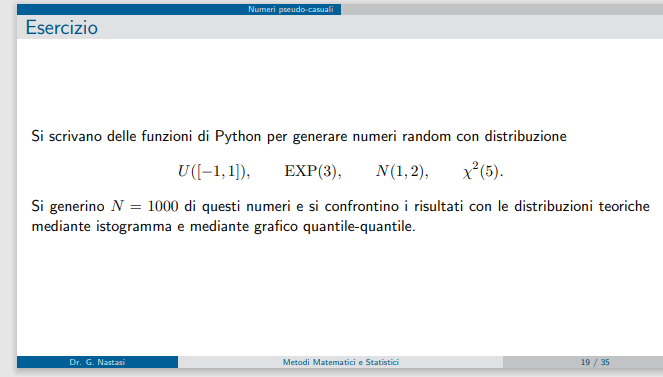

# Genero numeri randomici con distribuzione U([-1,1]) 

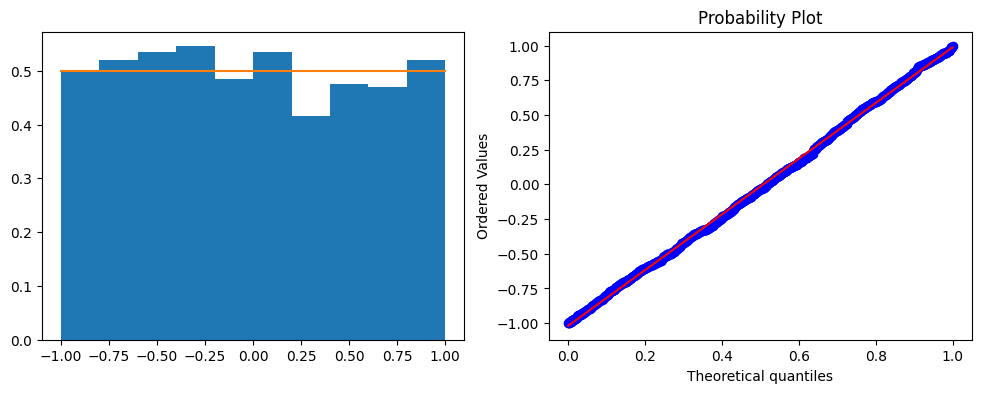

In [118]:
from scipy.stats import uniform, probplot

N = 1000
a = -1
b = 1

numeri = np.zeros(N)

for i in range(N):
    x= np.random.rand()
    Y = a + x*(b-a)
    numeri[i] = Y

#verificare se segue una distribuzione normale
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].hist(numeri, bins=10, density=True)
x= np.linspace(min(numeri),max(numeri))
y= uniform.pdf(x, a, b-a)
ax[0].plot(x,y)

probplot(numeri, dist=uniform, plot=ax[1])
plt.show()

# Genero numeri randomici con distribuzione EXP([3]) 

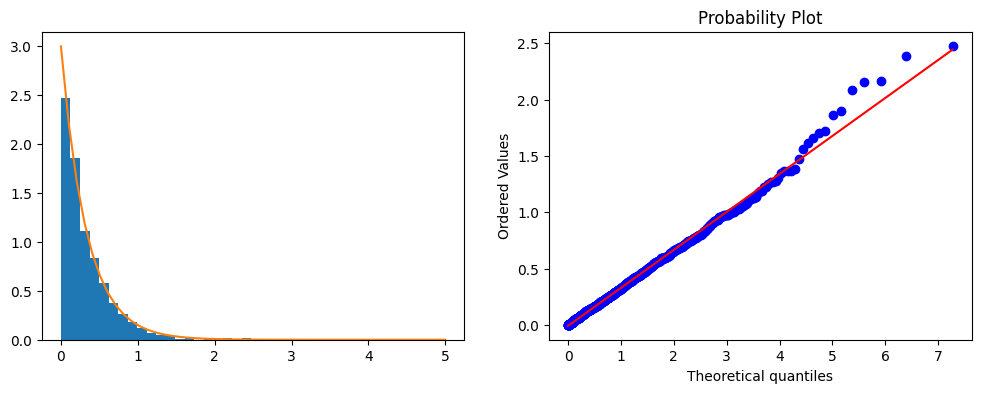

In [138]:
from scipy.stats import expon
lam = 3
N = 1000

v = np.zeros(N)
for i in range(N):
    x= np.random.rand()
    Y = -np.log(x)/lam
    v[i] = Y

fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].hist(v,bins=20,density=True)
xx= np.linspace(0, 5)
yy= expon.pdf(xx, scale=1/lam)
ax[0].plot(xx,yy)

probplot(v, dist=expon, plot=ax[1])
plt.show()

# Genero numeri randomici con distribuzione N([1,2]) 

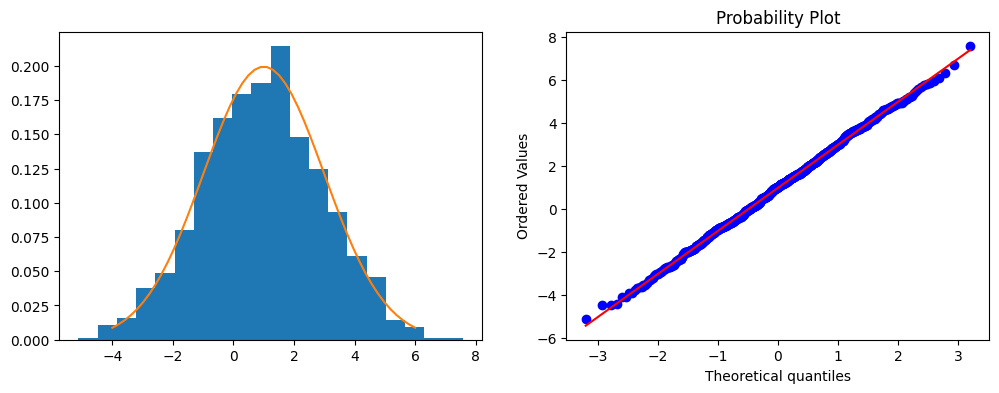

In [162]:
from scipy.stats import norm
mu = 1
sig = 2
N = 1000

v= np.random.rand(N)
x1 = v[0:int(N/2)] 
x2=  v[int(N/2):N] 

eta1 = np.sqrt(-2*np.log(x1)) * np.cos(2*np.pi*x2)
eta2= np.sqrt(-2*np.log(x1)) * np.sin(2*np.pi*x2)

v[0:int(N/2)] = mu+ sig*eta1
v[int(N/2):N] = mu + sig*eta2

fig , ax = plt.subplots(1,2,figsize=(12,4))

ax[0].hist(v,bins=20, density=True)
x= np.linspace(-4,6)
y= norm.pdf(x, mu, sig)
ax[0].plot(x,y)

probplot(v, dist=norm, plot=ax[1])
plt.show()

# Genero numeri randomici con distribuzione X^2([5]) 

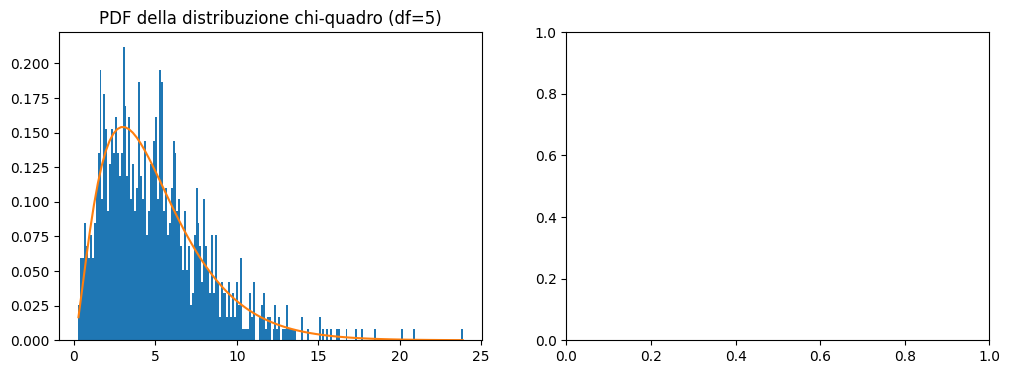

In [207]:
from scipy.stats import probplot, chi2
N = 1000

def chi(df,N):
    v = np.random.rand(N)
    x1 = v[0:int(N/2)] 
    x2=  v[int(N/2):N] 
    eta1 = np.sqrt(-2*np.log(x1)) * np.cos(2*np.pi*x2)
    eta2= np.sqrt(-2*np.log(x1)) * np.sin(2*np.pi*x2)
    v[0:int(N/2)] = eta1**2
    v[int(N/2):N] = eta2**2
    return sum(v[:5])

v= np.zeros(N)
for i in range(N):
    v[i]=chi(5,N)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].hist(v, bins=200, density=True)
xx = np.linspace(min(v), max(v), 100)
yy = chi2.pdf(xx, 5)
ax[0].plot(xx, yy, label='Chi-quadro PDF')
ax[0].set_title('PDF della distribuzione chi-quadro (df=5)')

plt.show()

# GENERARE NUMERI PSEUDO CAUSALI CON DISTRIBUZIONE F(X) = (1+cosx)/(2*pi)
# Intervallo [-pi,pi]

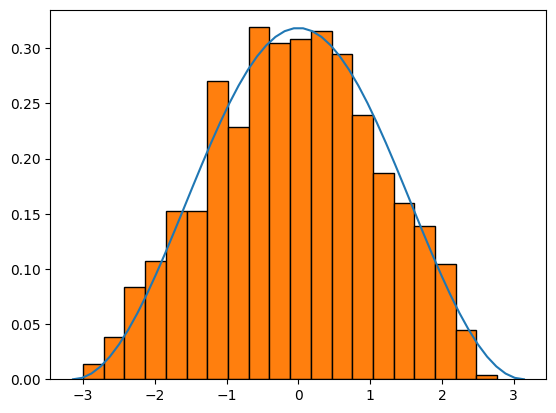

In [243]:
def f(X):
    return (1+np.cos(X))/(2*np.pi)

a = -np.pi
b = np.pi
M = 0.35 #lo vedo mediante il massimo della funzione

#x = np.linspace(a,b)
#y=  f(x) #cosi proov la funzione per ogni x che appartiene all'intervallo
# plt.plot(x,y)
#vedo cosi che il valore MAX è 0.3

def metodo_rigetto(a,b,M):
    while True:
        x1 = np.random.rand()
        x2 = np.random.rand()
        Y = a + x1*(b-a)
        Z=  x2*(M)
        if(Z <= f(Y)):
            break
    return Y #mi torna il valore giusto

v = np.zeros(N)
for i in range(N):
    v[i] = metodo_rigetto(a,b,M)  


xx= np.linspace(a, b)
yy= f(xx)
plt.plot(xx,yy)
plt.hist(v,bins=20,density=True,edgecolor='black')

plt.show()

Sia X ∼ N(0, 1). Si calcoli numericamente con il metodo hit or miss la probabilita
p = P(0.5 ≤ x ≤ 2).

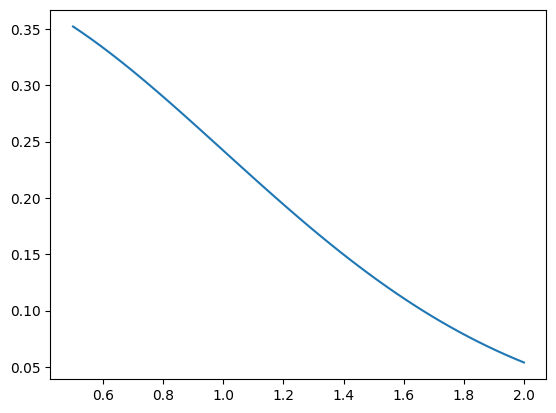

In [247]:
def f(X):
    return (1+np.cos(X))/(2*np.pi) #funzione fornita 


a = 0.5 #intervallo di a
b = 2 #intervallo d b


# vado a determinare il MASSIMO DELLA FUNZIONE
xx = np.linspace(a,b)
yy = norm.pdf(xx)

plt.plot(xx,yy)
plt.show()

In [257]:
M = 0.37
N = 10000
Ns= 0

#per stimare p -> generiamo N coppie ETA E NK.
for i in range(N):
    x1 = np.random.rand()
    x2 = np.random.rand()
    Y= a + x1*(b-a) #uniforme[a,b]
    Z= x2*M #unifomre[0,M]
    if(Z  < f(Y)): #SE F(Y) > Z allora finisce nel range
        Ns+=1 #NS =rappresenta il numero di punti che ifniscono in quell'intervallo
p= Ns/N  
I = p* M*(b-a)
print("probabilità empirica: ",I) #probabilità empirica di quanti punti sono contati in quell'intervallo
print("probabilità teorica : ", 1-(norm.sf(b)+norm.cdf(a))) #togliendo la norm sup e inf otteniamo la probaiblità teorica

probabilità empirica:  0.30386250000000004
probabilità teorica :  0.2857874067778077
